# Filter

### Task:
- Load in the dataset: xy
- filter the data that only the daily/yearly variation is shown

Whats done here

More Ideas examples or tasks?

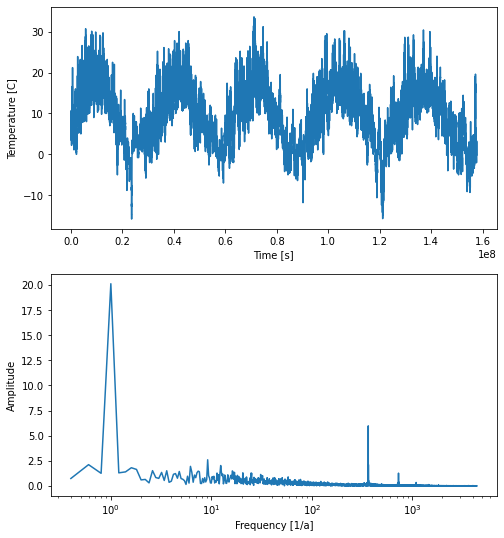

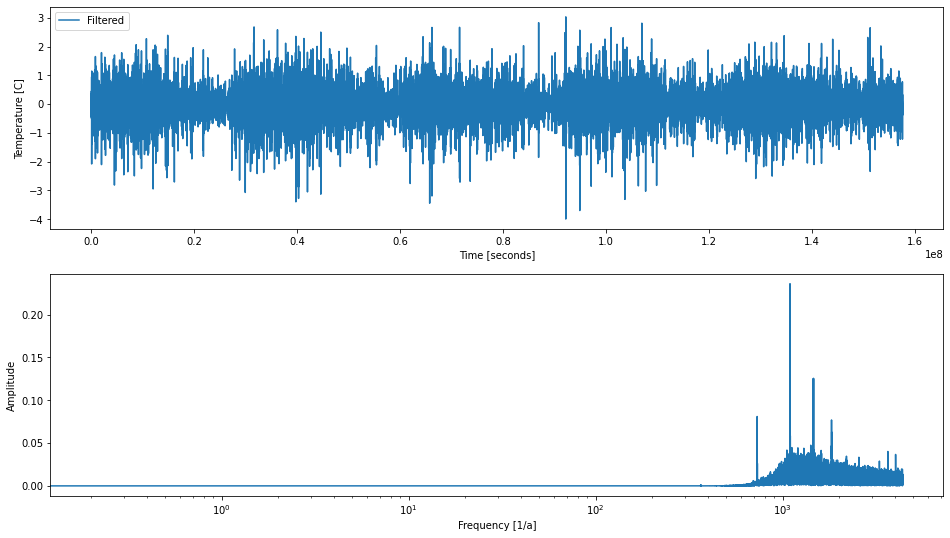

In [5]:
import numpy as num
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

file = 'data/hourly_data_modified.txt' 
#file = 'data/NY_climate_2010_modified.csv'

data = pd.read_csv(file)

tempcol = 'TT_TU'
#tempcol = 'HLY-TEMP-NORMAL'
timecol = 'seconds'

numyears = 5
idxyear = int(24*365 * numyears)

xdata = data[timecol][:idxyear]
ydata = data[tempcol][:idxyear]

## Sampling interval
dt = 1 / (24*365) # in years

df = 1 / dt  # Sampling frequency

nyquist = df / 2

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(ydata), d=dt)

plt.figure(figsize=(8, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(xdata, ydata)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [C]')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs[2:], amps[2:])
ax.set_xlabel('Frequency [1/a]')
ax.set_ylabel('Amplitude')

plt.show()

# Filter requirements.
filterfreq1 = 1000
filterfreq2 = 10000
order = 4

# One gotcha is that Wn is a fraction of the Nyquist frequency (half the sampling frequency).
# So if the sampling rate is 1000Hz and you want a cutoff of 250Hz, you should use Wn=0.5.
ws1 = filterfreq1 / nyquist
ws2 = filterfreq2 / nyquist

# b, a = sos = signal.butter(order, ws1, 'lowpass')
b, a = sos = signal.butter(order, ws1, 'highpass')
#b, a = sos = signal.butter(order, [ws1, ws2], 'bandpass')
# b, a = sos = signal.butter(order, [ws1, ws2], 'bandstop')

w, h = signal.freqz(b, a, int((1/filterfreq1) * 1000)) # last argument just to optimize the display quality

yfilt = signal.filtfilt(b, a, ydata)

amps = abs(num.fft.rfft(yfilt)) * dt
freqs = num.fft.rfftfreq(len(yfilt), d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
# ax.plot(xdata, ydata, zorder=-1, label='Original')
ax.plot(xdata, yfilt, label='Filtered')
ax.set_xlabel('Time [seconds]')
ax.set_ylabel('Temperature [C]')
ax.legend()

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
ax.set_xlabel('Frequency [1/a]')
ax.set_ylabel('Amplitude')


plt.show()

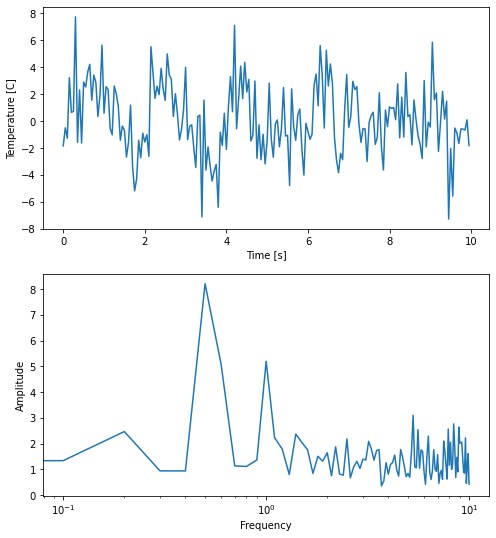

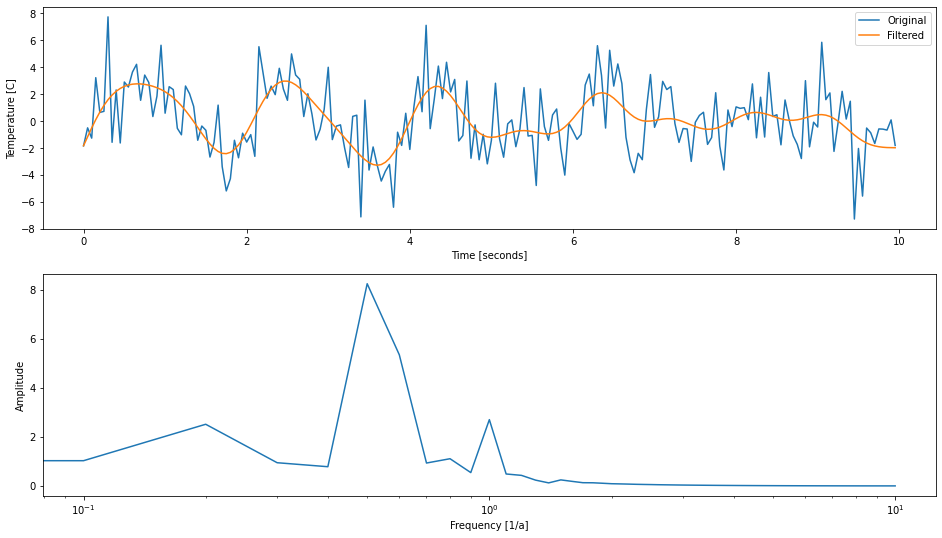

In [26]:
df = 20  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
xdata = num.arange(numsamples) / df
#print(x)
fr1 = 1 # frequency of signal  [Hz], inverse of periode
ydata = num.sin(2 * num.pi * fr1 * xdata)
ydata += num.sin(2 * num.pi * fr1*0.5 * xdata)
ydata += num.random.normal(0, 2, len(ydata))

nyquist = df / 2

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(ydata), d=dt)

plt.figure(figsize=(8, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(xdata, ydata)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [C]')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')


# Filter requirements.
filterfreq1 = 1
filterfreq2 = 2
order = 4

# One gotcha is that Wn is a fraction of the Nyquist frequency (half the sampling frequency).
# So if the sampling rate is 1000Hz and you want a cutoff of 250Hz, you should use Wn=0.5.
ws1 = filterfreq1 / nyquist
ws2 = filterfreq2 / nyquist

b, a = sos = signal.butter(order, ws1, 'lowpass')
# b, a = sos = signal.butter(order, ws1, 'highpass')
#b, a = sos = signal.butter(order, [ws1, ws2], 'bandpass')
# b, a = sos = signal.butter(order, [ws1, ws2], 'bandstop')

w, h = signal.freqz(b, a, int((1/filterfreq1) * 1000)) # last argument just to optimize the display quality

yfilt = signal.filtfilt(b, a, ydata)

amps = abs(num.fft.rfft(yfilt)) * dt
freqs = num.fft.rfftfreq(len(yfilt), d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(xdata, ydata, zorder=-1, label='Original')
ax.plot(xdata, yfilt, label='Filtered')
ax.set_xlabel('Time [seconds]')
ax.set_ylabel('Temperature [C]')
ax.legend()

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
ax.set_xlabel('Frequency [1/a]')
ax.set_ylabel('Amplitude')


plt.show()

       YYYY  MM  DD  hh  mm  ss  T    HEIGHT
0      2004   1   1   0   0   0  1  3481.276
1      2004   1   1   0  15   0  1  3481.321
2      2004   1   1   0  30   0  1  3481.371
3      2004   1   1   0  45   0  1  3481.418
4      2004   1   1   1   0   0  1  3481.457
...     ...  ..  ..  ..  ..  .. ..       ...
30989  2004  12  31  22  45   0  1  3481.689
30990  2004  12  31  23   0   0  1  3481.679
30991  2004  12  31  23  15   0  1  3481.658
30992  2004  12  31  23  30   0  1  3481.626
30993  2004  12  31  23  45   0  1  3481.585

[30994 rows x 8 columns]
Index(['YYYY', 'MM', 'DD', 'hh', 'mm', 'ss', 'T', 'HEIGHT'], dtype='object')


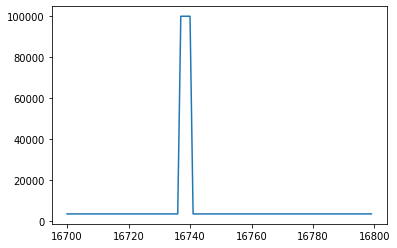

In [38]:
df = pd.read_csv('data/wave_height.csv', sep=' ')
print(df)
print(df.columns)
plt.plot(df['HEIGHT'][16700:16800])

6.026068036015674
7.049431890649347
3.7220233578109756
3.781583710797597
6.757874595202131
7.354932175814887
7.255043622432523
3.037812552005489
5.411990049426485
4.201627511787252
8.971634786156935
7.231612502305614
7.787528158796665
4.672563930408413
2.9053875124492636
9.32858910104846
6.2323315017949295
5.990176579184903
5.641745300546472
7.217292140690907
4.1654453438312755
4.3536041026327785
3.675304296218046
3.147118898611904
7.292123547478521
2.0691458871871937
2.691844814597035
9.458843292670673
2.854896307515058
8.454296387070176
3.973775341480204
7.974841790521164
6.384063085600141
2.116912427083144
9.902135130453827
9.300979658345216
8.920967422241795
5.216111990962371
7.449421644632208
2.5859689386446982
9.434974018877423
7.227524661315046
3.996378977201039
7.3802596492582415
9.81211189303449
4.391708670275188
8.694735707542714
7.865732536447965
8.181320293483147
7.092959782500673
7.943453722184198
2.1444529805608354
4.602011521847172
4.28811679446271
8.483970927937577
3.89

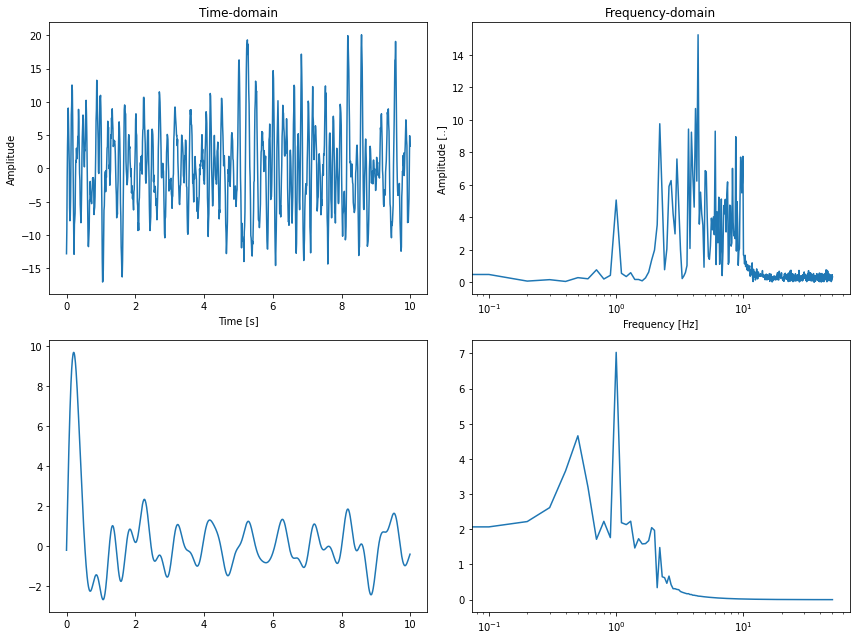

In [103]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
xdata = num.arange(numsamples) / df
#print(x)

fr1 = 1 # frequency of signal  [Hz]
ydata = num.sin(2 * num.pi * fr1 * xdata) + num.random.normal(0, 1, len(xdata))
nyquist = df / 2. # Nyquist-frequency

for ii in range(100):
    rnd1 = num.random.uniform(2, 10)
    rnd2 = num.random.normal(0, 0.01, 1)
    rnd3 = num.random.normal(0, num.pi, 1)
    print(rnd1)
    ydata += num.sin(2 * num.pi * rnd1 * (xdata + rnd3))

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(ydata), d=dt)

plt.figure(figsize=(12, 9))
ax = plt.subplot(2, 2, 1)
ax.plot(xdata, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')

ax = plt.subplot(2, 2, 2)
ax.plot(freqs, amps)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
ax.set_title('Frequency-domain')
plt.tight_layout()

# Filter requirements.
filterfreq1 = 0.5
filterfreq2 = 2
order = 4

# One gotcha is that Wn is a fraction of the Nyquist frequency (half the sampling frequency).
# So if the sampling rate is 1000Hz and you want a cutoff of 250Hz, you should use Wn=0.5.
ws1 = filterfreq1 / nyquist
ws2 = filterfreq2 / nyquist

# b, a = sos = signal.butter(order, ws1, 'lowpass')
# b, a = sos = signal.butter(order, ws1, 'highpass')
b, a = sos = signal.butter(order, [ws1, ws2], 'bandpass')
# b, a = sos = signal.butter(order, [ws1, ws2], 'bandstop')

w, h = signal.freqz(b, a, int((1/filterfreq1) * 1000)) # last argument just to optimize the display quality

yfilt = signal.filtfilt(b, a, ydata)

amps = abs(num.fft.rfft(yfilt)) * dt
freqs = num.fft.rfftfreq(len(yfilt), d=dt)


ax = plt.subplot(2, 2, 3)
ax.plot(xdata, yfilt, label='Filtered')
plt.tight_layout()

ax = plt.subplot(2, 2, 4)
ax.plot(freqs, amps)
ax.set_xscale('log')
# ax.set_yscale('log')
plt.tight_layout()
plt.show()